<a href="https://colab.research.google.com/github/vishwjeetgithub/invoke_rest_api/blob/main/Movies_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# prompt: read csv from google drive into pandas dataset

df = pd.read_csv('/content/drive/MyDrive/PractiseDataSets/MovieRecommendations/movies.csv')


In [ ]:
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# prompt: split delimited text and show unique values

df['genres_split'] = df['genres'].str.split('|')

In [ ]:
# prompt: explain genre for sublist in df['genres_split'] for genre in sublist
# unique_genres = set(genre for sublist in df['genres_split'] for genre in sublist)
# or
unique_genres = set(df['genres_split'].explode().reset_index()['genres_split'])
print(len(unique_genres))
print('unique_genres', unique_genres)
# print('unique_genre_set: ', unique_genre_set)

20
unique_genres {'Adventure', 'Film-Noir', 'Comedy', 'Action', 'Fantasy', 'Musical', 'Western', 'IMAX', 'Romance', 'Sci-Fi', '(no genres listed)', 'Documentary', 'Animation', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Drama', 'Children'}


In [ ]:
# prompt: explain genre for sublist in df['genres_split'] for genre in sublist

# for sublist in df['genres_split']:
#   for genre in sublist:
#     print(genre)

In [ ]:
# a = [1, 7, 2]

# myvar = pd.Series(a)

# print(myvar)

In [ ]:
# split_genre_str = df['genres'].str.split('|')
# print(type(split_genre_str))
# print(type(split_genre_str[0]))
# print(split_genre_str.to_list())
# print(split_genre_str)

In [ ]:
# exploded_string = split_genre_str.explode().reset_index()
# print(exploded_string)
# unique_genre_set = set(exploded_string['genres'])
# print(unique_genre_set)
# print("Unique genre count: ",len(unique_genre_set))


In [ ]:
df['year'] = pd.to_numeric(df['title'].str.extract(r'\((\d{4})\)', expand=False))

In [ ]:
df

,movieId,title,genres,genres_split,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]",2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]",2017.0
9739,193585,Flint (2017),Drama,[Drama],2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]",2018.0


In [ ]:
# exloded_genre_year = df.explode(['genres','year']).reset_index()
# print(exloded_genre_year)

In [ ]:
# print(split_genre_str.explode().value_counts())
# split_genre_str.explode().value_counts().plot(kind='bar')

<Axes: xlabel='genres_split'>

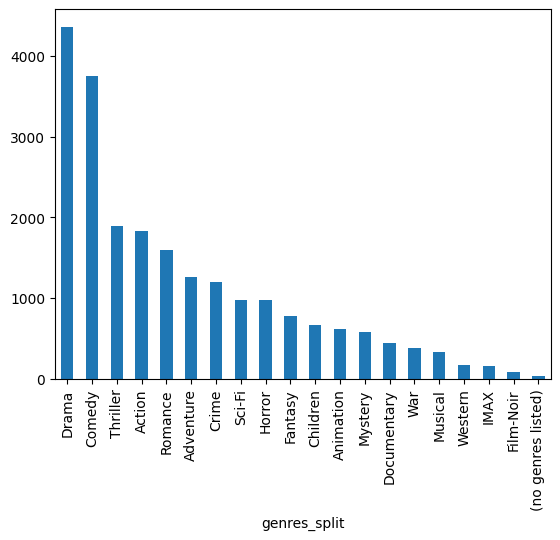

In [ ]:
df['genres_split'].explode().value_counts().plot(kind='bar')

In [ ]:
# df

In [ ]:
# prompt: add columns to data frame from a set

for genre in unique_genres:
  df[genre] = 0

for index, row in df.iterrows():
  for genre in row['genres_split']:
    df.at[index, genre] = 1

# df


In [ ]:
df['year'].isnull().sum()

13

In [ ]:
df[df['year'].isnull()]

,movieId,title,genres,genres_split,year,Adventure,Film-Noir,Comedy,Action,Fantasy,...,Documentary,Animation,Mystery,Horror,Thriller,Crime,War,Drama,Children,decade
6059,40697,Babylon 5,Sci-Fi,[Sci-Fi],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,"[Action, Sci-Fi, Thriller]",NaN,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
9091,143410,Hyena Road,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9179,149334,Nocturnal Animals,Drama|Thriller,"[Drama, Thriller]",NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,NaN
9259,156605,Paterson,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9367,162414,Moonlight,Drama,[Drama],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
9448,167570,The OA,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9514,171495,Cosmos,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),[(no genres listed)],NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
index_to_drop = df[df['year'].isnull()].index

In [ ]:
for idx in index_to_drop:
  # print(df.loc[idx,'year'], df.loc[idx,'decade'])
  df.drop(idx,inplace=True,axis=0)

In [ ]:
df[df['year'].isnull()]

,movieId,title,genres,genres_split,year,Adventure,Film-Noir,Comedy,Action,Fantasy,...,Documentary,Animation,Mystery,Horror,Thriller,Crime,War,Drama,Children,decade


In [ ]:
df['decade'] = df['year'].astype(int) // 10 * 10

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df

,movieId,title,genres,genres_split,year,Adventure,Film-Noir,Comedy,Action,Fantasy,...,Documentary,Animation,Mystery,Horror,Thriller,Crime,War,Drama,Children,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1990
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]",2017,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,2010
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]",2017,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2010
9739,193585,Flint (2017),Drama,[Drama],2017,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2010
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]",2018,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2010


### df_1 is the final df here

In [ ]:
df_1 = df.drop(columns=['genres','genres_split'],index=1)
df_1

,movieId,title,year,Adventure,Film-Noir,Comedy,Action,Fantasy,Musical,Western,...,Documentary,Animation,Mystery,Horror,Thriller,Crime,War,Drama,Children,decade
0,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1990
2,3,Grumpier Old Men (1995),1995,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
3,4,Waiting to Exhale (1995),1995,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1990
4,5,Father of the Bride Part II (1995),1995,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
5,6,Heat (1995),1995,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),2017,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,2010
9738,193583,No Game No Life: Zero (2017),2017,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2010
9739,193585,Flint (2017),2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2010
9740,193587,Bungo Stray Dogs: Dead Apple (2018),2018,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,2010


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9728 entries, 0 to 9741
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9728 non-null   int64 
 1   title               9728 non-null   object
 2   year                9728 non-null   int64 
 3   Adventure           9728 non-null   int64 
 4   Film-Noir           9728 non-null   int64 
 5   Comedy              9728 non-null   int64 
 6   Action              9728 non-null   int64 
 7   Fantasy             9728 non-null   int64 
 8   Musical             9728 non-null   int64 
 9   Western             9728 non-null   int64 
 10  IMAX                9728 non-null   int64 
 11  Romance             9728 non-null   int64 
 12  Sci-Fi              9728 non-null   int64 
 13  (no genres listed)  9728 non-null   int64 
 14  Documentary         9728 non-null   int64 
 15  Animation           9728 non-null   int64 
 16  Mystery             9728 non-

In [ ]:
drop_columns = ['title','year','movieId']
df_2 = df_1.drop(columns=drop_columns).groupby('decade').sum().reset_index()
# print(df_2)
# df_final.drop(columns=drop_columns).groupby('decade').sum().reset_index().plot(x='decade',kind='bar')

In [ ]:
# prompt: convert df_2 into 3 column dataframe decade, genre, and movies count
# value_vars[tuple, list, or ndarray, optional]: Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars

df_2_melted = df_2.melt(id_vars = "decade", var_name = "genre", value_name = "movies_count")
df_2_melted

,decade,genre,movies_count
0,1900.0,Adventure,1
1,1910.0,Adventure,1
2,1920.0,Adventure,5
3,1930.0,Adventure,13
4,1940.0,Adventure,13
...,...,...,...
235,1970.0,Children,38
236,1980.0,Children,69
237,1990.0,Children,182
238,2000.0,Children,190


In [ ]:
# prompt: select only top 5 genres with move count for each decade

top_5_genres = df_2_melted.groupby(['decade','genre']).sum().sort_values(by=['movies_count'], ascending=False).groupby('decade').head(5).sort_values(by=['decade','movies_count'],ascending=False).reset_index()
print(top_5_genres)

    decade      genre  movies_count
0   2010.0     Comedy           758
1   2010.0      Drama           743
2   2010.0     Action           464
3   2010.0   Thriller           417
4   2010.0  Adventure           292
5   2000.0      Drama          1365
6   2000.0     Comedy          1135
7   2000.0   Thriller           654
8   2000.0     Action           549
9   2000.0    Romance           523
10  1990.0      Drama          1038
11  1990.0     Comedy           890
12  1990.0    Romance           422
13  1990.0   Thriller           420
14  1990.0     Action           392
15  1980.0     Comedy           492
16  1980.0      Drama           439
17  1980.0     Action           227
18  1980.0   Thriller           180
19  1980.0     Horror           176
20  1970.0      Drama           225
21  1970.0     Comedy           155
22  1970.0     Action           103
23  1970.0   Thriller            95
24  1970.0  Adventure            71
25  1960.0      Drama           192
26  1960.0     Comedy       

In [ ]:
top_5_genres_pivot = top_5_genres.pivot_table(index='decade', columns='genre', values='movies_count').fillna(0)
top_5_genres_pivot

genre,Action,Adventure,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Romance,Sci-Fi,Thriller,Western
decade,,,,,,,,,,,,,
1900.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
1910.0,1.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1920.0,0.0,0.0,15.0,0.0,16.0,6.0,0.0,5.0,0.0,9.0,0.0,0.0,0.0
1930.0,0.0,0.0,53.0,15.0,74.0,0.0,0.0,0.0,22.0,48.0,0.0,0.0,0.0
1940.0,0.0,0.0,55.0,0.0,118.0,0.0,32.0,0.0,0.0,54.0,0.0,32.0,0.0
1950.0,0.0,0.0,67.0,0.0,146.0,0.0,0.0,0.0,0.0,64.0,35.0,32.0,0.0
1960.0,56.0,65.0,132.0,0.0,192.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0
1970.0,103.0,71.0,155.0,0.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0
1980.0,227.0,0.0,492.0,0.0,439.0,0.0,0.0,176.0,0.0,0.0,0.0,180.0,0.0


<Figure size 1200x600 with 0 Axes>

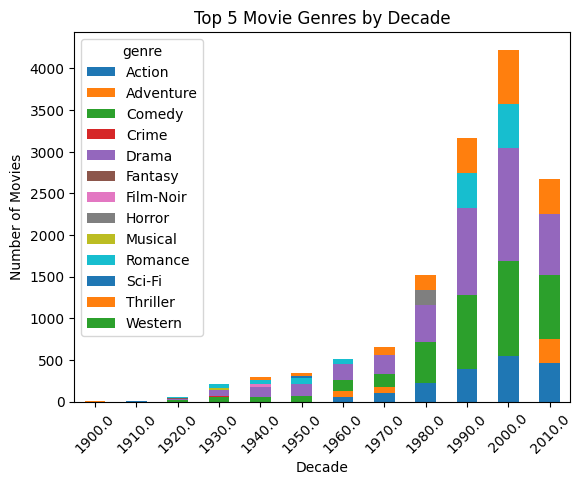

In [ ]:
# prompt: barchart with bars for each category in each decade ad category name
# Using matplotlib to create the chart

#  Plot the bar chart
plt.figure(figsize=(12,6))
top_5_genres_pivot.plot(kind='bar', stacked=True)
plt.title('Top 5 Movie Genres by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# decades = top_5_genres['decade'].unique().tolist()
# print(list(map(int, decades)))

decades = sorted(set(map(int,top_5_genres['decade'].tolist())),reverse=True)
print(decades)

[2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920, 1910, 1900]


In [ ]:
# print(len(decades))
# print(decades)
# print(top_5_genres[top_5_genres['genre']=='Drama']['movies_count'].count())
# list(map(int,top_5_genres[top_5_genres['genre']=='Drama']['decade']))

In [ ]:
def adjust_xtick(xtick,shift):
  return xtick + shift*0.6

rep_arr = [8]*len(decades)
print(rep_arr)
print(list(map(int,top_5_genres[top_5_genres['genre']=='Film-Noir']['decade'])))
print(list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Film-Noir']['decade'])),rep_arr)))
print(list(top_5_genres[top_5_genres['genre']=='Film-Noir']['movies_count']))

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[1940]
[1944.8]
[32]


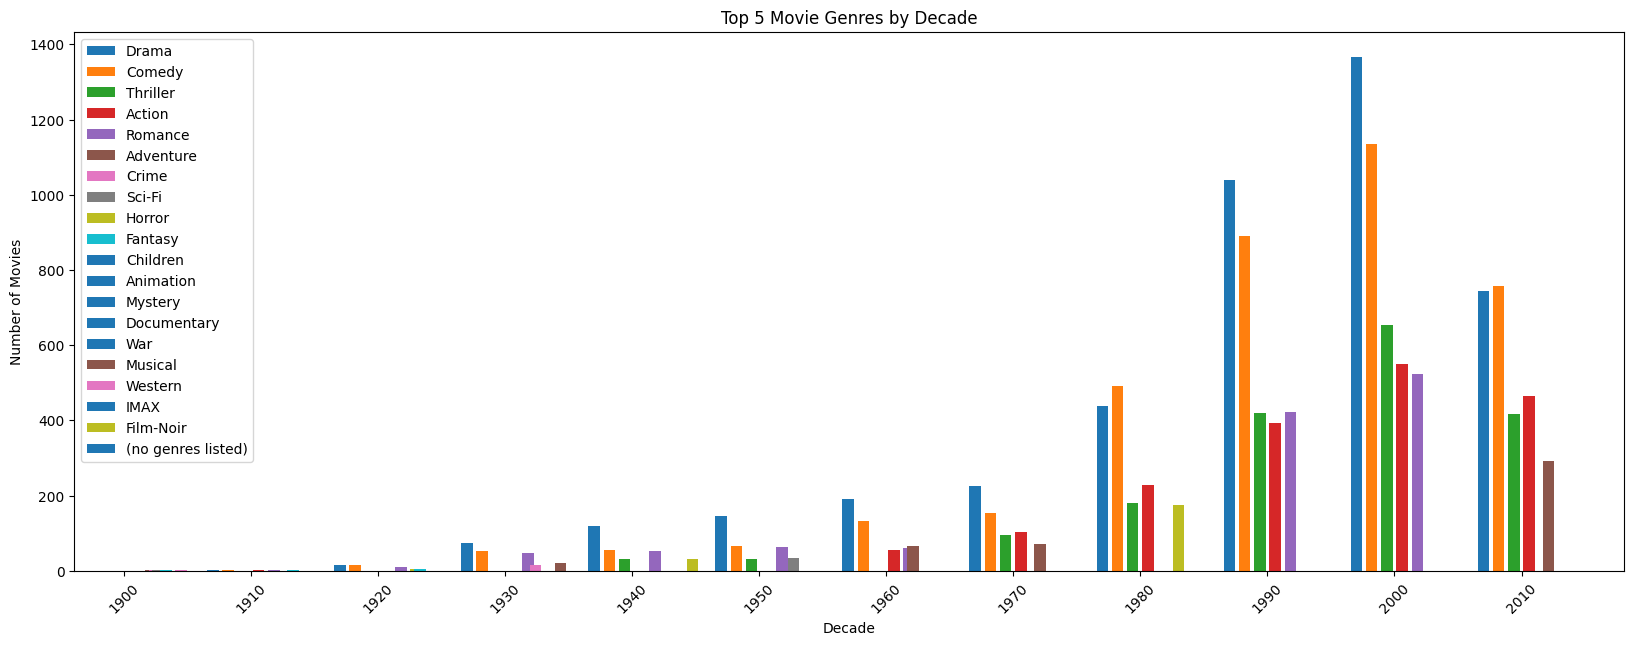

In [ ]:
# plt.plot(top_5_genres_pivot)
plt.figure(figsize=(20,7))
plt.xticks(decades,rotation=45)
_width = 0.9

# plt.bar(x=list(map(int,top_5_genres[top_5_genres['genre']=='Drama']['decade'])), height=top_5_genres[top_5_genres['genre']=='Drama']['movies_count'],label='Drama', width=_width)
# plt.bar(x=list(map(int,top_5_genres[top_5_genres['genre']=='Comedy']['decade'])),height=top_5_genres[top_5_genres['genre']=='Comedy']['movies_count'],label='Comedy', width=_width)
# plt.bar(x=list(map(int,top_5_genres[top_5_genres['genre']=='Thriller']['decade'])),height=top_5_genres[top_5_genres['genre']=='Thriller']['movies_count'],label='Thriller', width=_width)
# plt.bar(x=list(map(int,top_5_genres[top_5_genres['genre']=='Action']['decade'])),height=top_5_genres[top_5_genres['genre']=='Action']['movies_count'],label='Action', width=_width)
# plt.bar(x=list(map(int,top_5_genres[top_5_genres['genre']=='Romance']['decade'])),height=top_5_genres[top_5_genres['genre']=='Romance']['movies_count'],label='Romance', width=_width)

plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Drama']['decade'])),[-5]*len(decades))), height=top_5_genres[top_5_genres['genre']=='Drama']['movies_count'],label='Drama', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Comedy']['decade'])),[-3]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Comedy']['movies_count'],label='Comedy', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Thriller']['decade'])),[-1]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Thriller']['movies_count'],label='Thriller', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Action']['decade'])),[1]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Action']['movies_count'],label='Action', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Romance']['decade'])),[3]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Romance']['movies_count'],label='Romance', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Adventure']['decade'])),[3.5]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Adventure']['movies_count'],label='Adventure', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Crime']['decade'])),[4]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Crime']['movies_count'],label='Crime', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Sci-Fi']['decade'])),[4.5]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Sci-Fi']['movies_count'],label='Sci-Fi', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Horror']['decade'])),[5]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Horror']['movies_count'],label='Horror', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Fantasy']['decade'])),[5.5]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Fantasy']['movies_count'],label='Fantasy', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Children']['decade'])),[6]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Children']['movies_count'],label='Children', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Animation']['decade'])),[6.3]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Animation']['movies_count'],label='Animation', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Mystery']['decade'])),[6.6]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Mystery']['movies_count'],label='Mystery', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Documentary']['decade'])),[6.9]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Documentary']['movies_count'],label='Documentary', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='War']['decade'])),[7.1]*len(decades))),height=top_5_genres[top_5_genres['genre']=='War']['movies_count'],label='War', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Musical']['decade'])),[7.3]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Musical']['movies_count'],label='Musical', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Western']['decade'])),[7.5]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Western']['movies_count'],label='Western', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='IMAX']['decade'])),[7.7]*len(decades))),height=top_5_genres[top_5_genres['genre']=='IMAX']['movies_count'],label='IMAX', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='Film-Noir']['decade'])),[7.9]*len(decades))),height=top_5_genres[top_5_genres['genre']=='Film-Noir']['movies_count'],label='Film-Noir', width=_width)
plt.bar(x=list(map(adjust_xtick,list(map(int,top_5_genres[top_5_genres['genre']=='(no genres listed)']['decade'])),[8]*len(decades))),height=top_5_genres[top_5_genres['genre']=='(no genres listed)']['movies_count'],label='(no genres listed)', width=_width)

# plt.axies(top_5_genres['Decade'])
plt.title('Top 5 Movie Genres by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

In [ ]:
# Simple approach This approach doesn't work
df_3 = df_1.drop(columns=drop_columns)
# df_3['decade'].isna().index
df_3.drop(index=df_3[df_3['decade'].isna()].index,inplace=True,axis=0)
# df_3['decade'].isna().index


In [ ]:
# df_3.shape
df_3[df_3['decade'].isna()].index

Index([], dtype='int64')

In [ ]:
df_3['decade'] = df_3['decade'].astype(int)

# df_grouped = df_3.set_index('decade').sort_index(ascending=False)

# Now working on ratings table

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/PractiseDataSets/MovieRecommendations/ratings.csv')

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<Axes: >

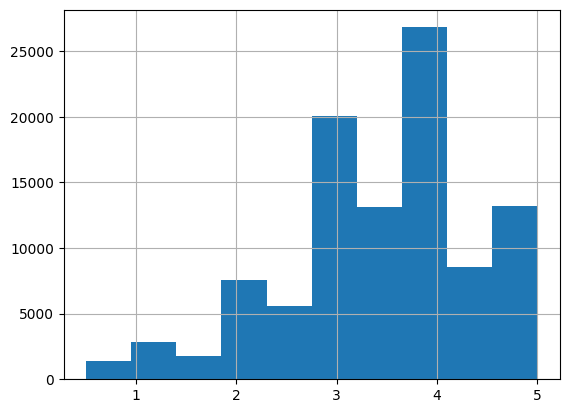

In [ ]:
ratings['rating'].hist()

In [ ]:
ratings_by_movieid = ratings['movieId'].value_counts()
ratings_by_movieid

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [ ]:
pd.DataFrame(ratings_by_movieid).value_counts().sort_values(ascending=False)

count
1        3446
2        1298
3         800
4         530
5         382
         ... 
224         1
307         1
279         1
237         1
329         1
Name: count, Length: 177, dtype: int64

<Axes: >

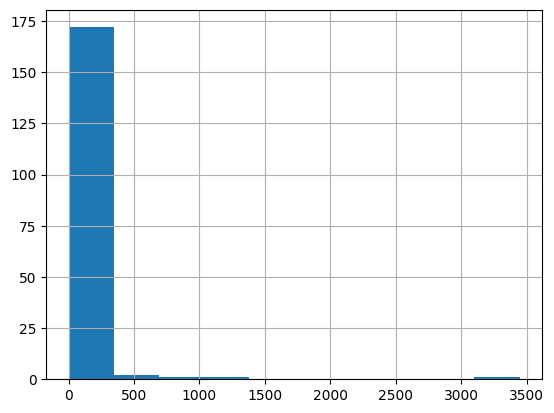

In [ ]:
pd.DataFrame(ratings_by_movieid).value_counts().hist()
# Most of the moves have got fewer ratings

array([[<Axes: title={'center': 'count'}>]], dtype=object)

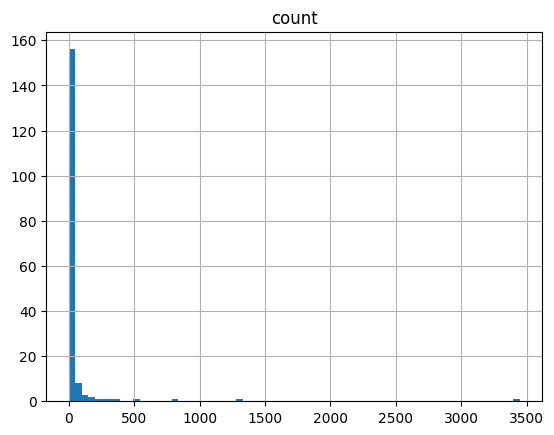

In [ ]:
# Histogram excluding outliers
pd.DataFrame(pd.DataFrame(ratings_by_movieid).value_counts().sort_values(ascending=False)).iloc[:,:].hist(bins=70)

# Analysis by number of ratings by users

In [ ]:
ratings['userId'].value_counts().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
147      20
207      20
189      20
595      20
53       20
Name: count, Length: 610, dtype: int64

# Only users who have rated 20 or more movies are present in the dataset
### Lets check for rating bias by users

In [ ]:
count1 = lambda value: (value==1).sum()
count5 = lambda value: (value==5).sum()

rating_by_userid = ratings[['userId','rating']].groupby('userId').agg(['count','mean','std',('count1',count1),('count5',count5)])
rating_by_userid

rating                                  
        count      mean       std count1 count5
userId                                         
1         232  4.366379  0.800048      1    124
2          29  3.948276  0.805615      0      6
3          39  2.435897  2.090642      0     10
4         216  3.555556  1.314204     23     64
5          44  3.636364  0.990441      1     10
...       ...       ...       ...    ...    ...
606      1115  3.657399  0.724121      6     33
607       187  3.786096  0.965657      3     52
608       831  3.134176  1.079262     29     23
609        37  3.270270  0.450225      0      0
610      1302  3.688556  0.857422     13    180

[610 rows x 5 columns]

In [ ]:
rating_by_userid.columns = rating_by_userid.columns.droplevel(0)
rating_by_userid

,count,mean,std,count1,count5
userId,,,,,
1,232,4.366379,0.800048,1,124
2,29,3.948276,0.805615,0,6
3,39,2.435897,2.090642,0,10
4,216,3.555556,1.314204,23,64
5,44,3.636364,0.990441,1,10
...,...,...,...,...,...
606,1115,3.657399,0.724121,6,33
607,187,3.786096,0.965657,3,52
608,831,3.134176,1.079262,29,23


In [ ]:
rating_by_userid.sort_values(by=['count'],ascending=False)

,count,mean,std,count1,count5
userId,,,,,
414,2698,3.391957,0.933307,40,248
599,2478,2.642050,0.815300,67,32
474,2108,3.398956,0.830847,36,59
448,1864,2.847371,1.029706,85,75
274,1346,3.235884,0.761703,15,11
...,...,...,...,...,...
442,20,1.275000,0.697269,5,0
569,20,4.000000,0.725476,0,5
320,20,3.525000,0.785979,0,0


# There are no extreme rating biases
# This dataset is already cleaned up

# Lets bring up the third dataset

In [ ]:
tags = pd.read_csv('/content/drive/MyDrive/PractiseDataSets/MovieRecommendations/tags.csv')

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# 4th dataset

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/PractiseDataSets/MovieRecommendations/links.csv')

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Try recommendation with movie and rating datasets

In [ ]:
print(df_1.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9728 entries, 0 to 9741
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9728 non-null   int64 
 1   title               9728 non-null   object
 2   year                9728 non-null   int64 
 3   Adventure           9728 non-null   int64 
 4   Film-Noir           9728 non-null   int64 
 5   Comedy              9728 non-null   int64 
 6   Action              9728 non-null   int64 
 7   Fantasy             9728 non-null   int64 
 8   Musical             9728 non-null   int64 
 9   Western             9728 non-null   int64 
 10  IMAX                9728 non-null   int64 
 11  Romance             9728 non-null   int64 
 12  Sci-Fi              9728 non-null   int64 
 13  (no genres listed)  9728 non-null   int64 
 14  Documentary         9728 non-null   int64 
 15  Animation           9728 non-null   int64 
 16  Mystery             9728 non-

In [ ]:
movie_rating = df_1.merge(ratings,on='movieId',how='left')

In [ ]:
movie_rating

,movieId,title,year,Adventure,Film-Noir,Comedy,Action,Fantasy,Musical,Western,...,Horror,Thriller,Crime,War,Drama,Children,decade,userId,rating,timestamp
0,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1990,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1990,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1990,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1990,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1990,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100721,193581,Black Butler: Book of the Atlantic (2017),2017,0,0,1,1,1,0,0,...,0,0,0,0,0,0,2010,184.0,4.0,1.537109e+09
100722,193583,No Game No Life: Zero (2017),2017,0,0,1,0,1,0,0,...,0,0,0,0,0,0,2010,184.0,3.5,1.537110e+09
100723,193585,Flint (2017),2017,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2010,184.0,3.5,1.537110e+09
100724,193587,Bungo Stray Dogs: Dead Apple (2018),2018,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2010,184.0,3.5,1.537110e+09
